In [ ]:
#Завантажуємо всі необхідні бібліотеки
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GRU, Input, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

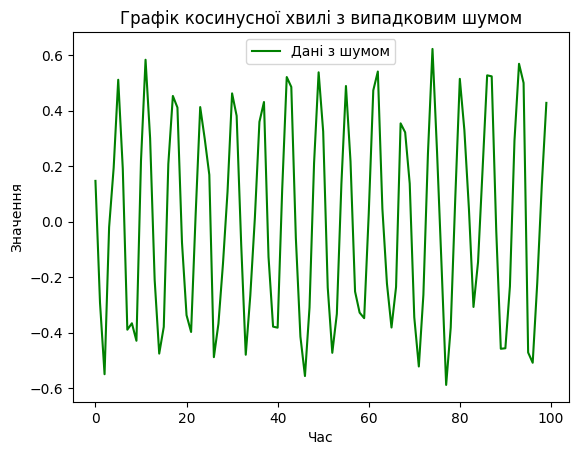

In [ ]:
#Генеруємо синтетичних даних за допомогою функції косинуса з шумом
N = 10000
data = np.array([np.sin(x + 3) / 2 for x in range(N)]) + 0.1 * np.random.randn(N)

#Створюємо графік
plt.plot(data[:100], color='green', label='Дані з шумом')
plt.xlabel('Час')
plt.ylabel('Значення')
plt.title('Графік косинусної хвилі з випадковим шумом')
plt.legend()
plt.show()

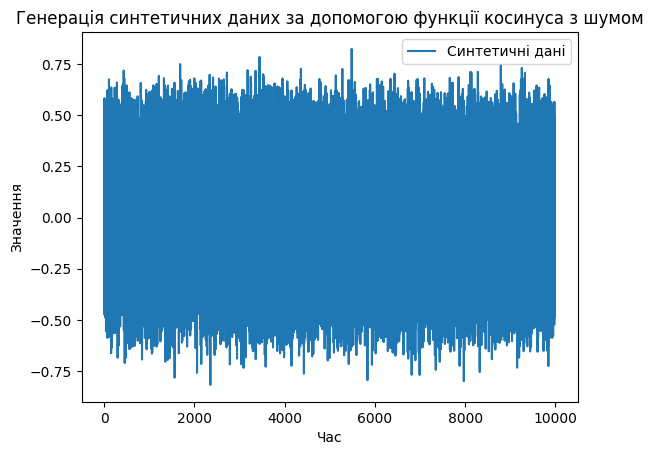

In [ ]:
# Генеруємо синтетичі даних за допомогою функції косинуса з шумом off = 3
off = 3
length = off * 2 + 1

X = np.array([np.diag(np.hstack((data[i:i + off], data[i + off + 1:i + length]))) for i in range(N - length)])
Y = data[off:N - off - 1]

#Створюємо графік
plt.plot(Y, label='Синтетичні дані')
plt.xlabel('Час')
plt.ylabel('Значення')
plt.title('Генерація синтетичних даних за допомогою функції косинуса з шумом')
plt.legend()
plt.show()

In [ ]:
# Створюємо модель Sequential
our_model = Sequential()

# Додаємо вхідний шар з вказаною формою вхідних даних
our_model.add(Input((length - 1, length - 1)))

# Додаємо двонаправленний рекурентний шар GRU з 4 нейронами та поверненням послідовностей
our_model.add(Bidirectional(GRU(4, return_sequences=True)))

# Додаємо шар Dropout з ймовірністю викиду 20%
our_model.add(Dropout(0.2))

# Додаємо ще один двонаправленний рекурентний шар GRU з 2 нейронами
our_model.add(Bidirectional(GRU(2)))

# Додаємо повнозв'язий шар з одним нейроном та використанням функції активації tanh
our_model.add(Dense(1, activation='tanh'))

# Виводимо структуру створеної моделі
our_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_12 (Bidirect  (None, 6, 8)              288       
 ional)                                                          
                                                                 
 dropout_6 (Dropout)         (None, 6, 8)              0         
                                                                 
 bidirectional_13 (Bidirect  (None, 4)                 144       
 ional)                                                          
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 437 (1.71 KB)
Trainable params: 437 (1.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Компілюємо та тренуємо модель
our_model.compile(loss='mean_squared_error', optimizer=Adam(0.01))
history = our_model.fit(X, Y, batch_size=32, epochs=10)

Epoch 1/10
313/313 [==============================] - 11s 11ms/step - loss: 0.0185
Epoch 2/10
313/313 [==============================] - 3s 11ms/step - loss: 0.0147
Epoch 3/10
313/313 [==============================] - 7s 21ms/step - loss: 0.0143
Epoch 4/10
313/313 [==============================] - 5s 16ms/step - loss: 0.0142
Epoch 5/10
313/313 [==============================] - 4s 14ms/step - loss: 0.0139
Epoch 6/10
313/313 [==============================] - 4s 12ms/step - loss: 0.0134
Epoch 7/10
313/313 [==============================] - 3s 11ms/step - loss: 0.0134
Epoch 8/10
313/313 [==============================] - 3s 11ms/step - loss: 0.0132
Epoch 9/10
313/313 [==============================] - 5s 15ms/step - loss: 0.0130
Epoch 10/10
313/313 [==============================] - 3s 11ms/step - loss: 0.0130


In [ ]:
#Передюачення моделі
XX = np.zeros(M)

# Ініціалізуємо перші off значень XX значеннями з даних
XX[:off] = data[:off]

# Передбачаємо та заповнюємо XX залишок значень
for i in range(M - off - 1):
    # Створюємо вхідний вектор для передбачення, використовуючи off попередніх значень з XX та одне значення з даних
    x = np.diag(np.hstack((XX[i:i + off], data[i + off + 1:i + length])))
    # Розширюємо розмірність вектора, оскільки модель очікує 3D-вхід
    x = np.expand_dims(x, axis=0)
    # Передбачаємо наступне значення за допомогою моделі
    y = our_model.predict(x)
    # Додаємо передбачене значення до XX
    XX[i + off] = y

1/1 [==============================] - 0s 22ms/step


<ipython-input-51-23da7edcaa9b>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  XX[i + off] = y


1/1 [==============================] - 0s 23ms/step


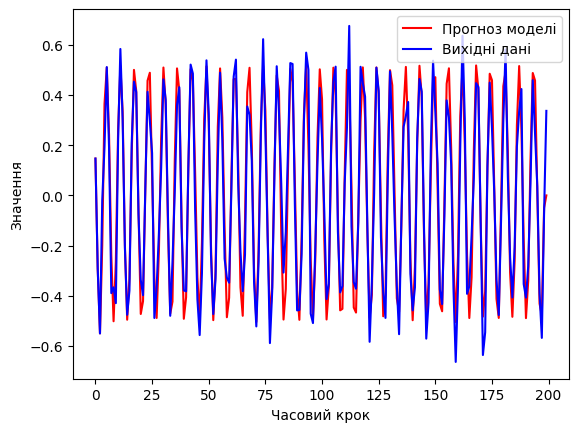

In [ ]:
# Будуємо прогнози моделі з графіком
plt.plot(XX[:M], color='red', label='Прогноз моделі')
plt.plot(data[:M], color='blue', label='Вихідні дані')
plt.xlabel('Часовий крок')
plt.ylabel('Значення')
plt.legend()
plt.show()

Висновки: Було успішно побудовано модель двонаправленої RNN, яка може апроксимувати функцію, враховуючи наявність шуму в даних. Модель навчалася на вхідних даних, що містять функцію з доданим шумом, та здатна була відтворювати цю функцію з високою точністю.